# Litecoin Price

by: Widya Meiriska

### 1. Read Dataset

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/bitcoin/litecoin_price.csv',parse_dates = ['Date'])

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,2013-05-02,3.78,4.04,3.01,3.37,-,65242700
1588,2013-05-01,4.29,4.36,3.52,3.80,-,73901200
1589,2013-04-30,4.40,4.57,4.17,4.30,-,75726800
1590,2013-04-29,4.37,4.57,4.23,4.38,-,74952700
1591,2013-04-28,4.30,4.40,4.18,4.35,-,73773400


### 2. Data Investigation

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.count()

Date          1592
Open          1592
High          1592
Low           1592
Close         1592
Volume        1592
Market Cap    1592
dtype: int64

In [6]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap             int64
dtype: object

#### There are missing data here and there are several data which have different format. Some of the data do not use number format

In [7]:
df['Volume'] = df['Volume'].replace('-', 'NaN')
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 

In [8]:
df.count()

Date          1592
Open          1592
High          1592
Low           1592
Close         1592
Volume        1349
Market Cap    1592
dtype: int64

In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,2013-05-02,3.78,4.04,3.01,3.37,NaN,65242700
1588,2013-05-01,4.29,4.36,3.52,3.80,NaN,73901200
1589,2013-04-30,4.40,4.57,4.17,4.30,NaN,75726800
1590,2013-04-29,4.37,4.57,4.23,4.38,NaN,74952700
1591,2013-04-28,4.30,4.40,4.18,4.35,NaN,73773400


In [10]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap             int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
Date          1592 non-null datetime64[ns]
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1349 non-null float64
Market Cap    1592 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.1 KB


In [12]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,243,0.152638
Market Cap,0,0.000000


I try to fill in the missing value by interpolated the data

In [13]:
# Lets see the correlation between each column
correlation = df.corr(method="pearson")
correlation['Volume']

Open          0.740296
High          0.767737
Low           0.730245
Close         0.759967
Volume        1.000000
Market Cap    0.784359
Name: Volume, dtype: float64

To fill the NaN value I try to interpolate the data using linear method using value from High column. Because from the information above we can see that Volume has the closest correlation with High column.

<function matplotlib.pyplot.show(*args, **kw)>

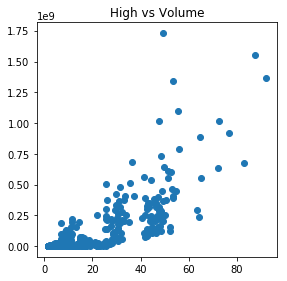

In [15]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
V = df['Volume']
MC = df['High']
plt.subplot(5,5,5)
plt.scatter(MC, V)
plt.title('High vs Volume')

plt.show

In [20]:
from sklearn import linear_model

model = linear_model.LinearRegression()
High  = df[['High']].iloc[0:1000]
Volume = df['Volume'].iloc[0:1000]

In [21]:
#Train model 
model.fit(High, Volume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(High, Volume)

0.6654096710846504

Here I make a new column Volume Predict which contains Volume with no NaN value

In [25]:
#Add a new column which is filled the missing data from model fit
open = df[['High']]
Volume_Predict = model.predict(open)
df['Volume Predict'] = Volume_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
1587,2013-05-02,3.78,4.04,3.01,3.37,NaN,65242700,7.771516e+06
1588,2013-05-01,4.29,4.36,3.52,3.80,NaN,73901200,1.067460e+07
1589,2013-04-30,4.40,4.57,4.17,4.30,NaN,75726800,1.257975e+07
1590,2013-04-29,4.37,4.57,4.23,4.38,NaN,74952700,1.257975e+07
1591,2013-04-28,4.30,4.40,4.18,4.35,NaN,73773400,1.103749e+07


In [26]:
df.count()

Date              1592
Open              1592
High              1592
Low               1592
Close             1592
Volume            1349
Market Cap        1592
Volume Predict    1592
dtype: int64

In [28]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap,Volume Predict
count,1592.000000,1592.000000,1592.000000,1592.000000,1.349000e+03,1.592000e+03,1.592000e+03
mean,8.470741,8.870232,8.068172,8.510704,3.845104e+07,3.430766e+08,5.159205e+07
std,11.536448,12.246791,10.817646,11.641428,1.351195e+08,5.718122e+08,1.111046e+08
min,1.150000,1.340000,1.110000,1.160000,4.817140e+05,3.794370e+07,-1.672326e+07
25%,3.050000,3.120000,2.970000,3.050000,1.712650e+06,1.186832e+08,-5.748511e+05
50%,3.840000,3.880000,3.780000,3.835000,2.917800e+06,1.702760e+08,6.319974e+06
75%,7.780000,8.180000,7.552500,7.790000,7.278630e+06,2.432428e+08,4.533017e+07
max,85.830000,92.070000,73.610000,86.040000,1.730780e+09,4.526680e+09,8.063918e+08


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [29]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Volume Predict')

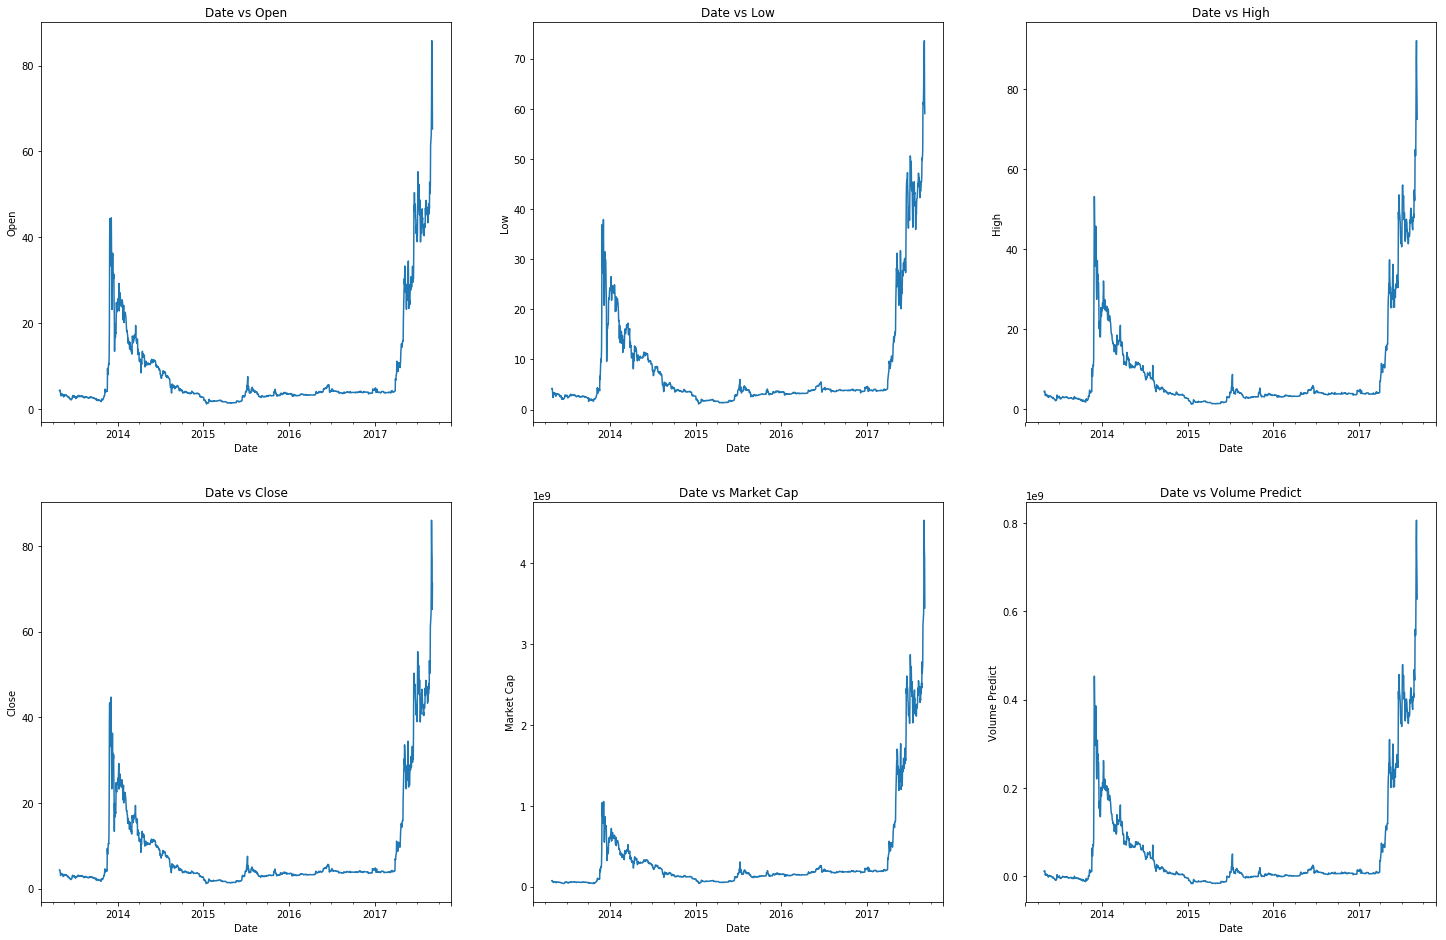

In [30]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,5)
plt.ylabel('Market Cap')
df['Market Cap'].plot()
plt.title('Date vs Market Cap')

plt.subplot(3,3,6)
plt.ylabel('Volume Predict')
df['Volume Predict'].plot()
plt.title('Date vs Volume Predict')